In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [2]:
mb_runs_path = "./data/macbook_air/runs.csv"
imac_runs_path = "./data/imac/runs.csv"
mb_df = pd.read_csv(mb_runs_path)
imac_df = pd.read_csv(imac_runs_path)

In [3]:
optims = mb_df["optim"].unique()
names = mb_df["name"].unique()
mb_df["bandwidthGB"] = mb_df["bandwidth"] / 1e9
imac_df["bandwidthGB"] = imac_df["bandwidth"] / 1e9

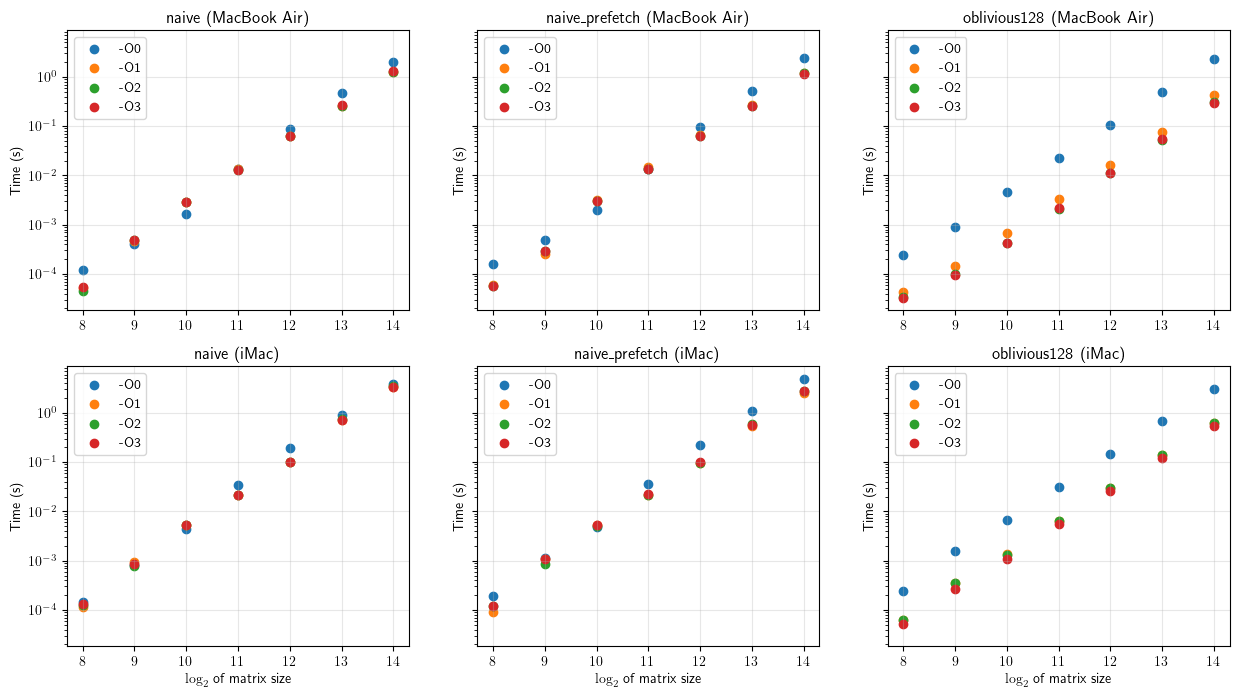

In [4]:
fig, ax = plt.subplots(2, len(names), figsize=(15, 8), sharey=True)

mb_means = mb_df.groupby(['name', 'optim', 'size']).mean()
imac_means = imac_df.groupby(['name', 'optim', 'size']).mean()

for i, name in enumerate(names):
    for optim in optims:
        mb_datapoints = mb_means.loc[name, optim]
        mb_x = list(mb_datapoints.index)
        mb_y = list(mb_datapoints['time'])
        imac_datapoints = imac_means.loc[name, optim]
        imac_x = list(imac_datapoints.index)
        imac_y = list(imac_datapoints['time'])
        plt.yscale("log")
        ax[0,i].scatter(mb_x, mb_y, label=f"-O{optim}")
        ax[0,i].legend(loc="upper left")
        ax[0,i].set_ylabel("Time (s)")
        #ax[0,i].set_xlabel("Matrix size")
        ax[0,i].title.set_text(name + " (MacBook Air)")
        ax[1,i].scatter(imac_x, imac_y, label=f"-O{optim}")
        ax[1,i].legend(loc="upper left")
        ax[1,i].set_ylabel("Time (s)")
        ax[1,i].set_xlabel(r'$\log_2$ of matrix size')
        ax[1,i].title.set_text(name + " (iMac)")
    ax[0,i].grid(alpha=0.3)
    ax[1,i].grid(alpha=0.3)
plt.savefig('./report/images/time_comparision.png', bbox_inches='tight', pad_inches=0, dpi=300)

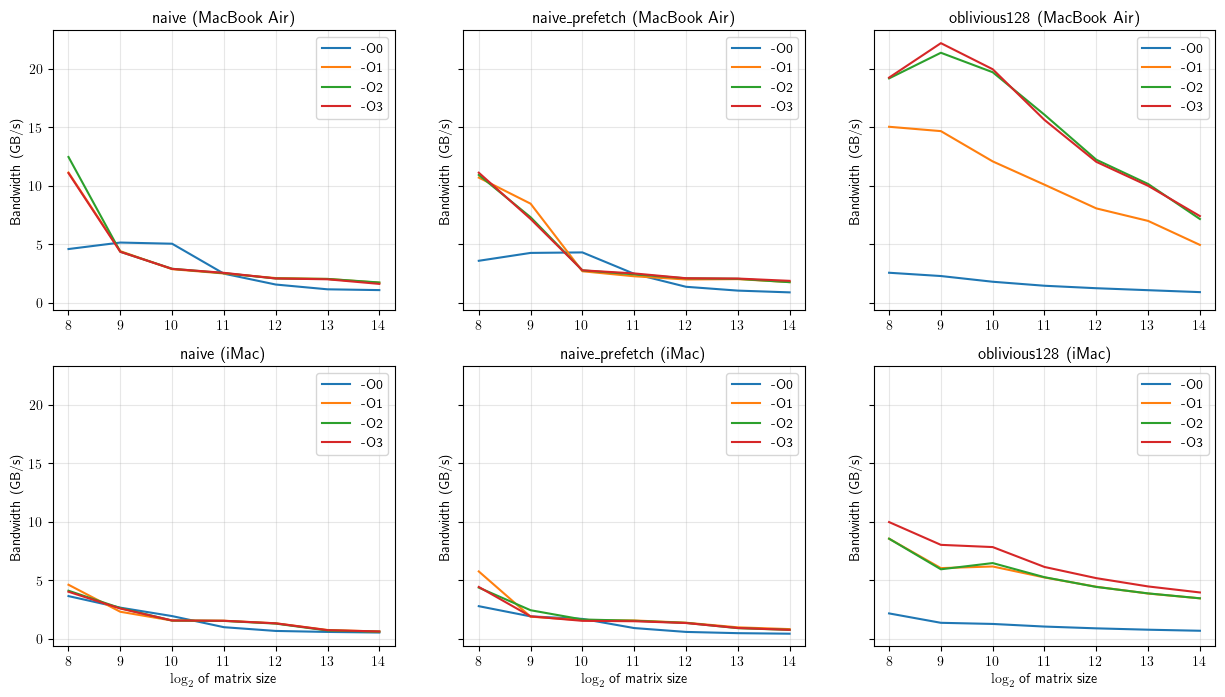

In [5]:
fig, ax = plt.subplots(2, len(names), figsize=(15, 8), sharey=True)

mb_means = mb_df.groupby(['name', 'optim', 'size']).mean()
imac_means = imac_df.groupby(['name', 'optim', 'size']).mean()

for i, name in enumerate(names):
    for optim in optims:
        mb_datapoints = mb_means.loc[name, optim]
        mb_x = list(mb_datapoints.index)
        mb_y = list(mb_datapoints['bandwidthGB'])
        imac_datapoints = imac_means.loc[name, optim]
        imac_x = list(imac_datapoints.index)
        imac_y = list(imac_datapoints['bandwidthGB'])
        #plt.yscale("log")
        ax[0,i].plot(mb_x, mb_y, label=f"-O{optim}")
        ax[0,i].legend(loc="upper right")
        ax[0,i].set_ylabel("Bandwidth (GB/s)")
        #ax[0,i].set_xlabel("Matrix size")
        ax[0,i].title.set_text(name + " (MacBook Air)")
        ax[1,i].plot(imac_x, imac_y, label=f"-O{optim}")
        ax[1,i].legend(loc="upper right")
        ax[1,i].set_ylabel("Bandwidth (GB/s)")
        ax[1,i].set_xlabel(r'$\log_2$ of matrix size')
        ax[1,i].title.set_text(name + " (iMac)")
    ax[0,i].grid(alpha=0.3)
    ax[1,i].grid(alpha=0.3)
plt.savefig('./report/images/bandwidth_comparision.png', bbox_inches='tight', pad_inches=0, dpi=300)


In [6]:
def compute_speedup(data, name, optim_base, optim_ref):
    speedup_data = (data.loc[name, optim_base]['time'] / data.loc[name, optim_ref]['time'])
    return speedup_data

In [7]:
compute_speedup(mb_means, 'naive', 0, 3)

size
8     2.252722
9     0.846618
10    0.576221
11    1.030681
12    1.333134
13    1.758938
14    1.498499
Name: time, dtype: float64

In [8]:
imac_cache_path = "./data/imac/cache.csv"
imac_cache_df = pd.read_csv(imac_cache_path)

In [9]:
imac_cache_df

,name,Ir,I1mr,ILmr,Dr,D1mr,DLmr,Dw,D1mw,DLmw
0,naive-0,28151086243,1555,1543,9126769952,142619523,142611044,2550145286,16777913,16777870
1,naive-1,20635221432,1546,1539,5100303729,142619526,142611050,2415919378,16777913,16777869
2,naive-2,20635221454,1547,1540,5100303736,142619526,142611051,2415919382,16777912,16777868
3,naive-3,20635155875,1546,1539,5100303725,142619525,142611050,2415919370,16777913,16777869
4,naive_prefetch-0,31103695943,1556,1544,9529398534,142619526,142611045,2550145269,16777911,16777871
5,naive_prefetch-1,20903722374,1549,1542,5100352866,142628423,142611070,2415935749,16777908,16777867
6,naive_prefetch-2,20903820647,1548,1541,5100402010,142637296,142611084,2415935749,16777909,16777868
7,naive_prefetch-3,21037866448,1547,1540,5100320120,142628421,142611068,2415935764,16777909,16777868
8,oblivious128-0,82715504222,1564,1552,32333070310,169389823,41547753,6107073478,33566242,33555450
9,oblivious128-1,43513704210,1551,1544,10869749115,169301607,41547768,5501004734,33561871,33555430


In [12]:
cache_df = imac_cache_df[['name', 'Ir', 'Dr', 'D1mr', 'DLmr', 'Dw', 'D1mw', 'DLmw']]
cache_df

,name,Ir,Dr,D1mr,DLmr,Dw,D1mw,DLmw
0,naive-0,28151086243,9126769952,142619523,142611044,2550145286,16777913,16777870
1,naive-1,20635221432,5100303729,142619526,142611050,2415919378,16777913,16777869
2,naive-2,20635221454,5100303736,142619526,142611051,2415919382,16777912,16777868
3,naive-3,20635155875,5100303725,142619525,142611050,2415919370,16777913,16777869
4,naive_prefetch-0,31103695943,9529398534,142619526,142611045,2550145269,16777911,16777871
5,naive_prefetch-1,20903722374,5100352866,142628423,142611070,2415935749,16777908,16777867
6,naive_prefetch-2,20903820647,5100402010,142637296,142611084,2415935749,16777909,16777868
7,naive_prefetch-3,21037866448,5100320120,142628421,142611068,2415935764,16777909,16777868
8,oblivious128-0,82715504222,32333070310,169389823,41547753,6107073478,33566242,33555450
9,oblivious128-1,43513704210,10869749115,169301607,41547768,5501004734,33561871,33555430


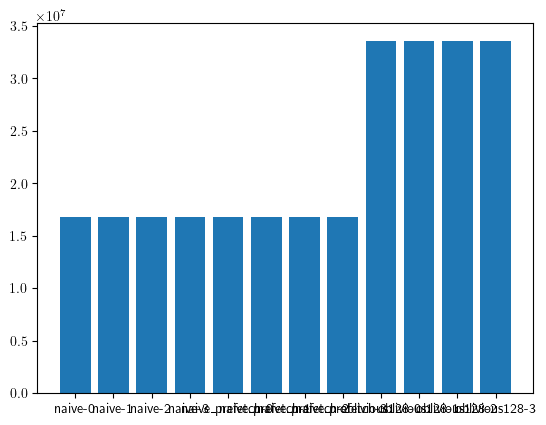

In [23]:
plt.bar(x=cache_df['name'], height=cache_df['D1mw'])
plt.show()

In [ ]:
20_635_155_875